In [301]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Datasets for the 5 cities

In [302]:


A_data=pd.read_csv("adilabad_hw.csv")

print("The dataset for the required city is:")
A_data

The dataset for the required city is:


,YEAR,MO,DY,T2M,QV2M
0,2016,1,1,23.94,5.25
1,2016,1,2,23.91,4.94
2,2016,1,3,22.27,5.00
3,2016,1,4,21.64,5.49
4,2016,1,5,21.83,4.88
...,...,...,...,...,...
2552,2022,12,27,23.64,15.14
2553,2022,12,28,22.94,13.49
2554,2022,12,29,20.29,10.44
2555,2022,12,30,21.95,10.50


In [303]:
'''Function to predict heat wave
        0-No heat wave
        1-Mild heat wave
        2-Intense heat wave'''

def Heat_wave_pred(df):
    L=[]
    mean=df.mean()
    for i in df:
        if i-mean>=4.5 and i-mean<6.4:
            L.append(1)
        elif i-mean>6.4:
            L.append(2)
        elif i>=45:
            L.append(1)
        elif i>=47:
            L.append(2)
        else:
            L.append(0)
    return L
#A_data["HWP"]=Heat_wave_pred(A_data["T2M"])

In [304]:
#Converting the year month and day columns to datetime data type

L=[]
l=[]
for i in range(2557):
    L.append(str(A_data["DY"][i])+"  "+str(A_data["MO"][i])+"  "+str(A_data["YEAR"][i]))
    l.append(i)
A_data["Date"]=L
A_data["Index"]=l
A_data['Date'] =  A_data["Date"].apply(pd.to_datetime,infer_datetime_format=True)
A_data["Date"]

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
2552   2022-12-27
2553   2022-12-28
2554   2022-12-29
2555   2022-12-30
2556   2022-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [305]:
A_data_test=A_data[["Date","T2M"]]
A_data_test.set_index("Date",inplace=True)
A_data_test

,T2M
Date,
2016-01-01,23.94
2016-02-01,23.91
2016-03-01,22.27
2016-04-01,21.64
2016-05-01,21.83
...,...
2022-12-27,23.64
2022-12-28,22.94
2022-12-29,20.29


# Printing the dataset

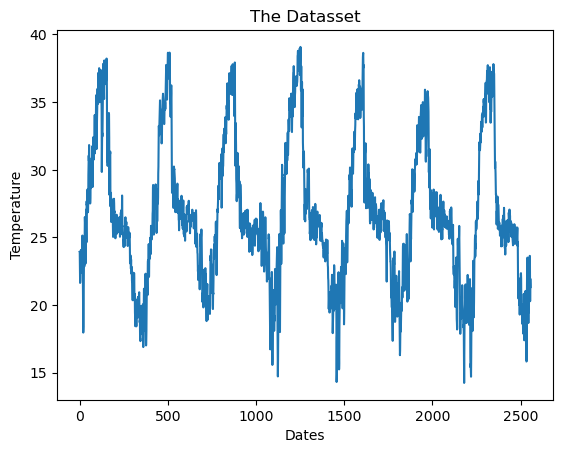

In [306]:
plt.title("The Datasset")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(np.array(A_data["Index"]),np.array(A_data["T2M"]))

# Splitting in test adn training dataset

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose
train=A_data_test.iloc[:-30]
test=A_data_test.iloc[-30:]

In [308]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(A_data_test)
print("The p-value of the dataset is:",dfa[1])

The p-value of the dataset is: 0.004131306388184976


In [309]:
#pip install pmdarima

In [310]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(A_data_test["T2M"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6862.474, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7039.167, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6995.519, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6978.690, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7037.170, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6870.849, Time=2.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6860.478, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6966.903, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6927.256, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6862.475, Time=2.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6903.098, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6863.600, Time=2.48 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6858.481, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6964.906, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3425.241
Date:                Sat, 04 Mar 2023   AIC                           6858.481
Time:                        18:53:59   BIC                           6881.866
Sample:                             0   HQIC                          6866.962
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8373      0.039     21.691      0.000       0.762       0.913
ar.L2         -0.2548      0.017    -15.288      0.000      -0.287      -0.222
ma.L1         -0.7206      0.039    -18.598      0.000      -0.797      -0.645
sigma2         0.8540      0.017     50.052      0.000       0.821       0.887
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               573.17
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.56
Prob(H) (two-sided):                  0.99   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The training data is:


,T2M
Date,
2016-01-01,23.94
2016-02-01,23.91
2016-03-01,22.27
2016-04-01,21.64
2016-05-01,21.83
...,...
2022-11-27,17.90
2022-11-28,18.44
2022-11-29,18.26


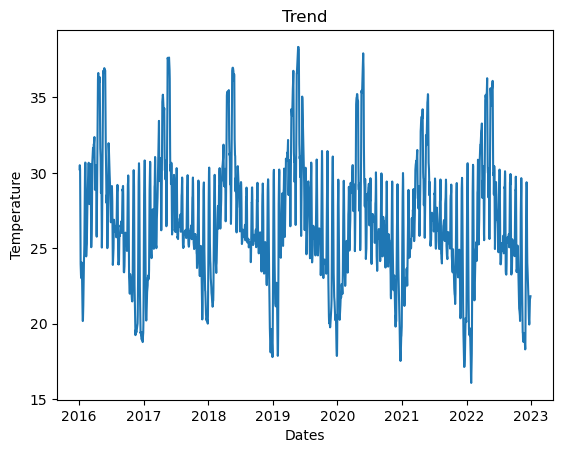

In [311]:
A_data_test.sort_index(inplace=True)
decompose = seasonal_decompose(A_data_test)
trend=decompose.trend
seasonal=decompose.seasonal
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Trend")
plt.plot(trend)
print("The training data is:")
train

In [312]:
from statsmodels.tsa.arima.model import ARIMA 
model =ARIMA(train,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2527
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3393.335
Date:                          Sat, 04 Mar 2023   AIC                           6798.670
Time:                                  18:55:12   BIC                           6833.605
Sample:                                       0   HQIC                          6811.354
                                         - 2527                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8297      0.041     20.439      0.000       0.750       0.909
ar.L2         -0.2506      0.017    -14.472      0.000      -0.284      -0.217
ma.L1         -0.7159      0.040    -17.689      0.000      -0.795      -0.637
ar.S.L30       0.0452      0.019      2.319      0.020       0.007       0.083
ma.S.L30      -0.9828      0.013    -77.580      0.000      -1.008      -0.958
sigma2         0.8540      0.020     43.329      0.000       0.815       0.893
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               363.15
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.50
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Predicted values for the month of December 2022')

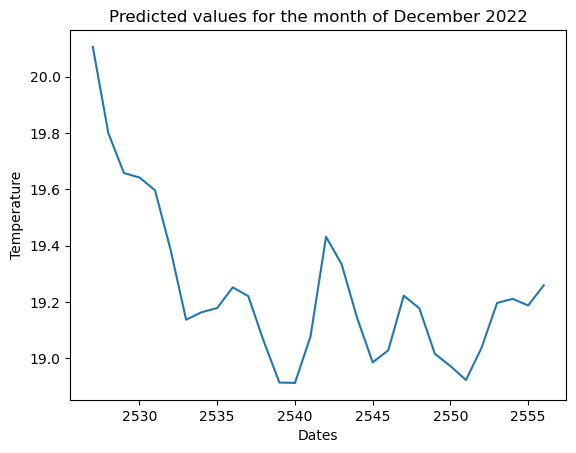

In [313]:
starts=len(train)
ends=len(train)+len(test)-1
pred=model_fit.predict(start=starts,end=ends,typ='levels')
plt.plot(pred)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Predicted values for the month of December 2022")

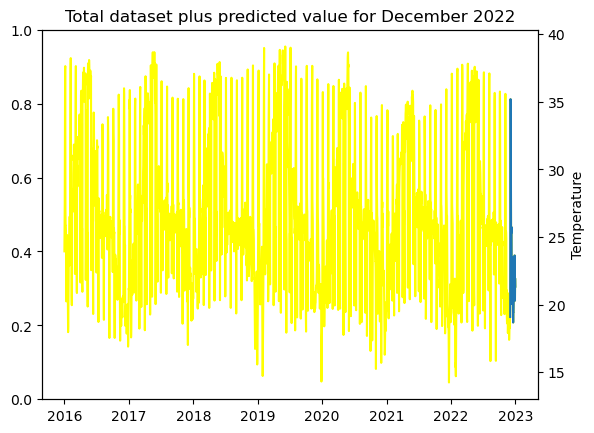

In [314]:
res=pd.DataFrame(pred)
res.columns=["T2M"]
final_data =pd.DataFrame(train)
pred_data=final_data.append(res)
fig,ax1=plt.subplots()
ax2=ax1.twinx()
#curve1=ax1.plot(pred_data,label='predicted Temp',color='black')
curve2=ax2.plot(A_data_test,label="Actual Temp",color='yellow')
plt.plot(A_data_test[-30:])
#plt.plot(pred)
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Total dataset plus predicted value for December 2022")
plt.plot()
plt.show()

# Performance of the model

In [315]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
L=[]
for i in pred:
    L.append(i)
l=list(test["T2M"])
rmse=sqrt(mean_squared_error(pred,test["T2M"]))
ame=mean_absolute_error(pred,test["T2M"])
print("Average Temperature         : ",A_data_test['T2M'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  26.809264763394875
Root mean Square value      :  2.517689455132139
Mean absolute Error         :  2.049852707352685


# Forecasting for the year 2023

# Predictions for January

In [317]:
#Since Jan has 31 days we use 31 in seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. Jan 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2557
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6130.051
Date:                          Sat, 04 Mar 2023   AIC                          12272.101
Time:                                  19:03:18   BIC                          12307.105
Sample:                              01-01-2016   HQIC                         12284.803
                                   - 12-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6432      0.017     38.197      0.000       0.610       0.676
ar.L2         -0.0585      0.018     -3.313      0.001      -0.093      -0.024
ma.L1         -0.9503      0.007   -144.141      0.000      -0.963      -0.937
ar.S.L31       0.5267      0.017     31.776      0.000       0.494       0.559
ma.S.L31      -0.9999      2.438     -0.410      0.682      -5.778       3.779
sigma2         7.2215     17.552      0.411      0.681     -27.180      41.622
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4797.03
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.13
Prob(H) (two-sided):                  0.42   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [318]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of Jan 2023 is:",pred_new)

The predicted Temperature values of each day of Jan 2023 is: 2023-01-01    21.453260
2023-01-02    21.391633
2023-01-03    26.012591
2023-01-04    29.483233
2023-01-05    29.475679
2023-01-06    27.644569
2023-01-07    24.494423
2023-01-08    24.731534
2023-01-09    24.762880
2023-01-10    24.989967
2023-01-11    21.728843
2023-01-12    23.423630
2023-01-13    23.714997
2023-01-14    23.486279
2023-01-15    23.088148
2023-01-16    23.133671
2023-01-17    22.885364
2023-01-18    21.307791
2023-01-19    20.892903
2023-01-20    21.431193
2023-01-21    21.410748
2023-01-22    21.602562
2023-01-23    21.966313
2023-01-24    21.626536
2023-01-25    21.532739
2023-01-26    22.456580
2023-01-27    23.533181
2023-01-28    23.152031
2023-01-29    21.690380
2023-01-30    22.576647
2023-01-31    22.272059
Freq: D, Name: predicted_mean, dtype: float64


In [319]:
#Combining the pred Jan2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

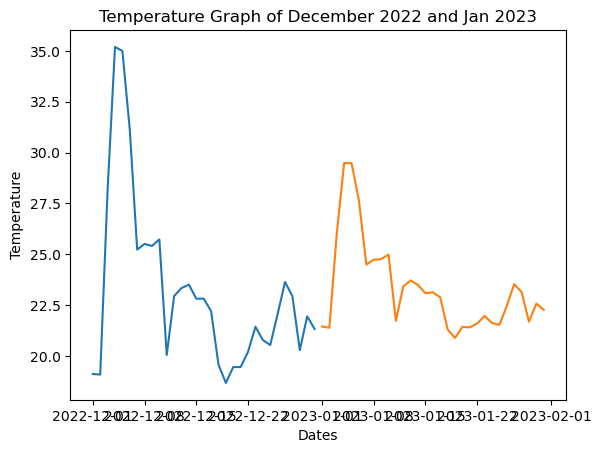

In [320]:
plt.title("Temperature Graph of December 2022 and Jan 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

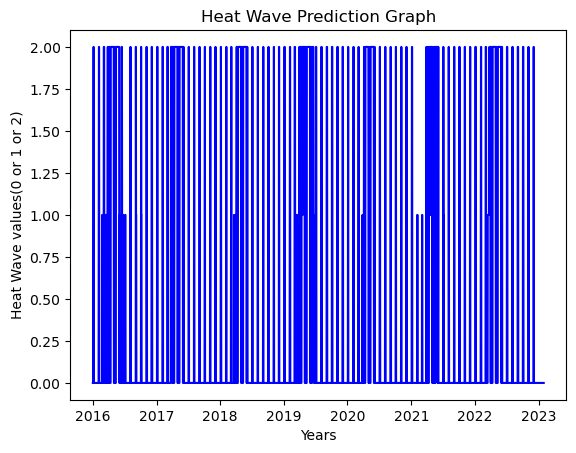

In [321]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [322]:
pred_data_Jan

,T2M,HWP
2016-01-01,23.940000,0
2016-01-02,26.050000,0
2016-01-03,27.510000,0
2016-01-04,32.150000,1
2016-01-05,37.360000,2
...,...,...
2023-01-27,23.533181,0
2023-01-28,23.152031,0
2023-01-29,21.690380,0
2023-01-30,22.576647,0


In [323]:
#Updating the original dataset to the combined data

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-01-27,23.533181
2023-01-28,23.152031
2023-01-29,21.690380
2023-01-30,22.576647
2023-01-31,22.272059


# Predictions for February

In [324]:
#Since Feb has 28 days we use 28 in seasonal order as we need 28 outputs and we need to forecast the next 28 days ie. Feb 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,28))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2588
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 28)   Log Likelihood               -6507.117
Date:                          Sat, 04 Mar 2023   AIC                          13026.235
Time:                                  19:04:11   BIC                          13061.319
Sample:                              01-01-2016   HQIC                         13038.957
                                   - 01-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8650      0.017     50.795      0.000       0.832       0.898
ar.L2         -0.2438      0.020    -12.342      0.000      -0.283      -0.205
ma.L1         -0.9476      0.008   -117.364      0.000      -0.963      -0.932
ar.S.L28      -0.0217      0.019     -1.140      0.254      -0.059       0.016
ma.S.L28      -0.9997      0.638     -1.568      0.117      -2.250       0.250
sigma2         8.9999      5.721      1.573      0.116      -2.213      20.213
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              2063.46
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.34
Prob(H) (two-sided):                  0.90   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [325]:
pred_new =model_fit.forecast(28)
print("The predicted Temperature values of each day of Feb 2023 are:",pred_new)

The predicted Temperature values of each day of Feb 2023 are: 2023-02-01    22.480295
2023-02-02    22.310312
2023-02-03    21.634120
2023-02-04    21.626979
2023-02-05    21.452371
2023-02-06    21.139123
2023-02-07    20.990710
2023-02-08    20.947774
2023-02-09    20.565242
2023-02-10    20.733869
2023-02-11    21.124185
2023-02-12    21.091835
2023-02-13    21.404391
2023-02-14    21.691432
2023-02-15    22.182833
2023-02-16    22.440718
2023-02-17    22.426521
2023-02-18    22.801916
2023-02-19    22.931458
2023-02-20    23.111953
2023-02-21    23.414422
2023-02-22    23.340750
2023-02-23    23.352250
2023-02-24    23.610552
2023-02-25    23.701584
2023-02-26    23.590384
2023-02-27    23.032109
2023-02-28    23.054472
Freq: D, Name: predicted_mean, dtype: float64


In [326]:
#Combining the pred Feb2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

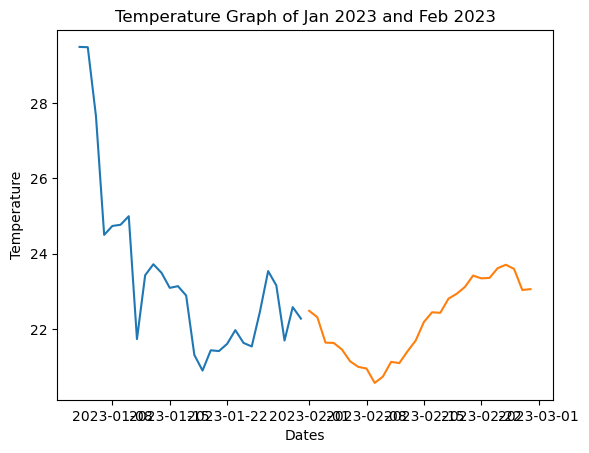

In [327]:
plt.title("Temperature Graph of Jan 2023 and Feb 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-28:])
plt.plot(pred_data[-28:])

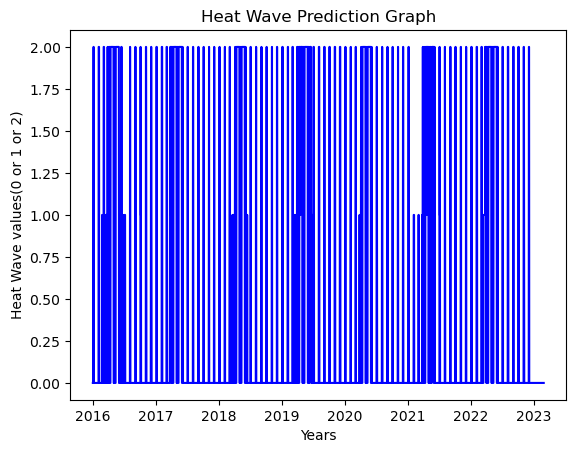

In [328]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [329]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-02-24,23.610552
2023-02-25,23.701584
2023-02-26,23.590384
2023-02-27,23.032109
2023-02-28,23.054472


# Predictions for March

In [330]:
#Since March has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. March 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2616
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6245.326
Date:                          Sat, 04 Mar 2023   AIC                          12502.651
Time:                                  19:05:32   BIC                          12537.794
Sample:                              01-01-2016   HQIC                         12515.388
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6460      0.016     39.161      0.000       0.614       0.678
ar.L2         -0.0588      0.017     -3.397      0.001      -0.093      -0.025
ma.L1         -0.9507      0.006   -147.619      0.000      -0.963      -0.938
ar.S.L31       0.5239      0.016     32.427      0.000       0.492       0.556
ma.S.L31      -0.9999      4.783     -0.209      0.834     -10.374       8.374
sigma2         7.0712     33.769      0.209      0.834     -59.115      73.257
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5179.41
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.06   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [331]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-03-01    22.135226
2023-03-02    22.541422
2023-03-03    22.363780
2023-03-04    22.440065
2023-03-05    22.457528
2023-03-06    21.987984
2023-03-07    21.780844
2023-03-08    21.808004
2023-03-09    21.864912
2023-03-10    21.769170
2023-03-11    21.837349
2023-03-12    21.717617
2023-03-13    21.865644
2023-03-14    21.827233
2023-03-15    21.966127
2023-03-16    22.217418
2023-03-17    22.056064
2023-03-18    22.287061
2023-03-19    22.470092
2023-03-20    22.536724
2023-03-21    22.555888
2023-03-22    22.686509
2023-03-23    22.906336
2023-03-24    23.047719
2023-03-25    22.804963
2023-03-26    22.527044
2023-03-27    22.670057
2023-03-28    22.757044
2023-03-29    22.814497
2023-03-30    22.752449
2023-03-31    22.754380
Freq: D, Name: predicted_mean, dtype: float64


In [332]:
#Combining the pred March2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

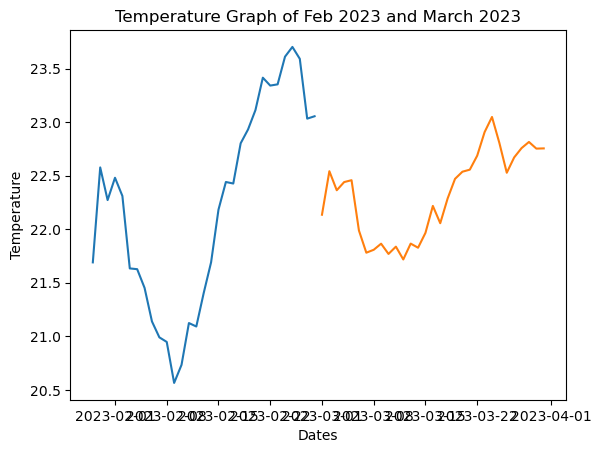

In [333]:
plt.title("Temperature Graph of Feb 2023 and March 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

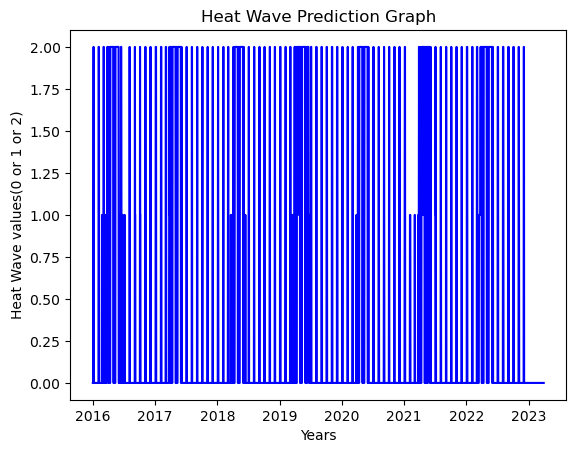

In [334]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [335]:

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-03-27,22.670057
2023-03-28,22.757044
2023-03-29,22.814497
2023-03-30,22.752449
2023-03-31,22.754380





# Predictions of April

In [336]:
#Since April has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. April 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2647
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6427.307
Date:                          Sat, 04 Mar 2023   AIC                          12866.613
Time:                                  19:06:30   BIC                          12901.830
Sample:                              01-01-2016   HQIC                         12879.369
                                   - 03-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6471      0.015     42.817      0.000       0.618       0.677
ar.L2         -0.0743      0.020     -3.734      0.000      -0.113      -0.035
ma.L1         -0.9505      0.008   -122.830      0.000      -0.966      -0.935
ar.S.L30       0.4448      0.014     32.951      0.000       0.418       0.471
ma.S.L30      -0.9998      1.655     -0.604      0.546      -4.243       2.244
sigma2         7.6517     12.658      0.604      0.546     -17.158      32.461
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2961.38
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.55
Prob(H) (two-sided):                  0.06   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [337]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of April 2023 are:",pred_new)
    

The predicted Temperature values of each day of April 2023 are: 2023-04-01    22.851935
2023-04-02    22.754712
2023-04-03    22.911555
2023-04-04    22.769058
2023-04-05    22.129688
2023-04-06    21.638348
2023-04-07    21.877515
2023-04-08    22.200317
2023-04-09    22.166394
2023-04-10    22.049867
2023-04-11    21.833848
2023-04-12    22.038744
2023-04-13    22.058310
2023-04-14    22.043322
2023-04-15    22.423212
2023-04-16    22.321707
2023-04-17    22.339262
2023-04-18    22.544986
2023-04-19    22.470468
2023-04-20    22.365030
2023-04-21    22.360999
2023-04-22    22.526715
2023-04-23    22.791070
2023-04-24    22.701603
2023-04-25    22.427090
2023-04-26    22.183311
2023-04-27    22.290625
2023-04-28    22.731177
2023-04-29    22.981177
2023-04-30    22.853640
Freq: D, Name: predicted_mean, dtype: float64


In [338]:
#Combining the pred April2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

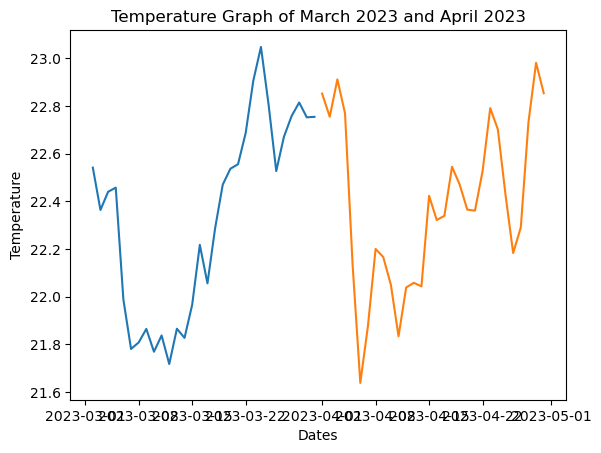

In [339]:
plt.title("Temperature Graph of March 2023 and April 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

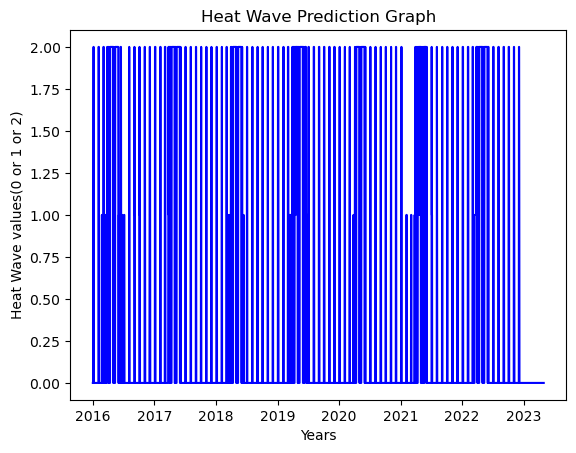

In [340]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [341]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-04-26,22.183311
2023-04-27,22.290625
2023-04-28,22.731177
2023-04-29,22.981177
2023-04-30,22.853640


# Predictions for May

In [342]:
#Since May has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. May 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2677
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6361.175
Date:                          Sat, 04 Mar 2023   AIC                          12734.350
Time:                                  19:07:31   BIC                          12769.633
Sample:                              01-01-2016   HQIC                         12747.123
                                   - 04-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6461      0.016     40.093      0.000       0.615       0.678
ar.L2         -0.0588      0.017     -3.480      0.001      -0.092      -0.026
ma.L1         -0.9507      0.006   -151.251      0.000      -0.963      -0.938
ar.S.L31       0.5237      0.016     33.189      0.000       0.493       0.555
ma.S.L31      -0.9997      0.882     -1.134      0.257      -2.728       0.728
sigma2         6.9096      6.044      1.143      0.253      -4.936      18.755
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5659.50
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [343]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of May 2023 are:",pred_new)

The predicted Temperature values of each day of May 2023 are: 2023-05-01    22.740938
2023-05-02    22.683975
2023-05-03    22.615612
2023-05-04    22.708691
2023-05-05    22.613743
2023-05-06    22.384591
2023-05-07    22.014603
2023-05-08    21.944807
2023-05-09    22.235916
2023-05-10    22.436769
2023-05-11    22.357572
2023-05-12    22.331477
2023-05-13    22.521679
2023-05-14    22.590329
2023-05-15    22.342243
2023-05-16    22.698846
2023-05-17    22.729646
2023-05-18    22.431583
2023-05-19    22.514094
2023-05-20    22.520546
2023-05-21    22.537065
2023-05-22    22.359136
2023-05-23    22.509072
2023-05-24    22.773050
2023-05-25    22.707439
2023-05-26    22.360055
2023-05-27    21.950474
2023-05-28    22.014646
2023-05-29    22.288640
2023-05-30    22.536486
2023-05-31    22.696657
Freq: D, Name: predicted_mean, dtype: float64


In [344]:
#Combining the pred May2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

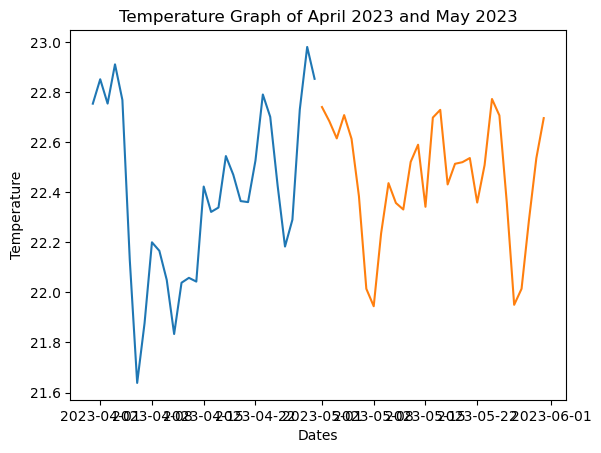

In [345]:
plt.title("Temperature Graph of April 2023 and May 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

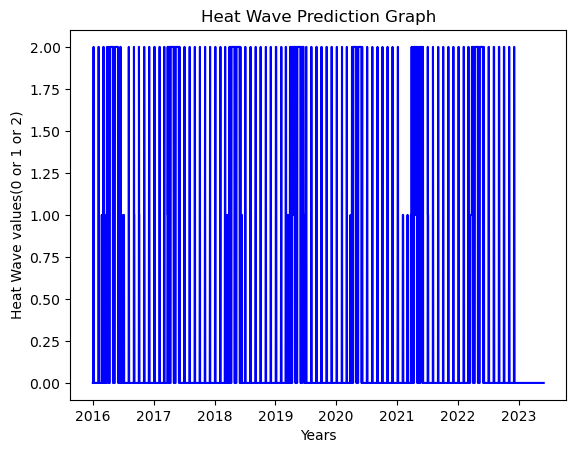

In [346]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [347]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-05-27,21.950474
2023-05-28,22.014646
2023-05-29,22.288640
2023-05-30,22.536486
2023-05-31,22.696657


# Predictions for June

In [348]:
#Since June has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. June 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2708
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6545.603
Date:                          Sat, 04 Mar 2023   AIC                          13103.205
Time:                                  19:08:37   BIC                          13138.560
Sample:                              01-01-2016   HQIC                         13115.996
                                   - 05-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6474      0.015     43.830      0.000       0.618       0.676
ar.L2         -0.0745      0.019     -3.829      0.000      -0.113      -0.036
ma.L1         -0.9506      0.008   -125.816      0.000      -0.965      -0.936
ar.S.L30       0.4445      0.013     33.697      0.000       0.419       0.470
ma.S.L30      -0.9998      1.672     -0.598      0.550      -4.277       2.278
sigma2         7.4787     12.501      0.598      0.550     -17.023      31.980
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3248.94
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [349]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-06-01    22.768922
2023-06-02    22.911684
2023-06-03    22.831754
2023-06-04    22.378208
2023-06-05    21.887403
2023-06-06    21.945653
2023-06-07    22.208303
2023-06-08    22.350385
2023-06-09    22.297441
2023-06-10    22.101523
2023-06-11    22.226382
2023-06-12    22.349244
2023-06-13    22.304626
2023-06-14    22.455196
2023-06-15    22.588657
2023-06-16    22.518253
2023-06-17    22.504547
2023-06-18    22.439374
2023-06-19    22.330020
2023-06-20    22.276065
2023-06-21    22.261460
2023-06-22    22.527840
2023-06-23    22.666809
2023-06-24    22.488882
2023-06-25    22.027596
2023-06-26    21.908506
2023-06-27    22.346373
2023-06-28    22.744710
2023-06-29    22.731135
2023-06-30    22.751217
Freq: D, Name: predicted_mean, dtype: float64


In [350]:
#Combining the pred June2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

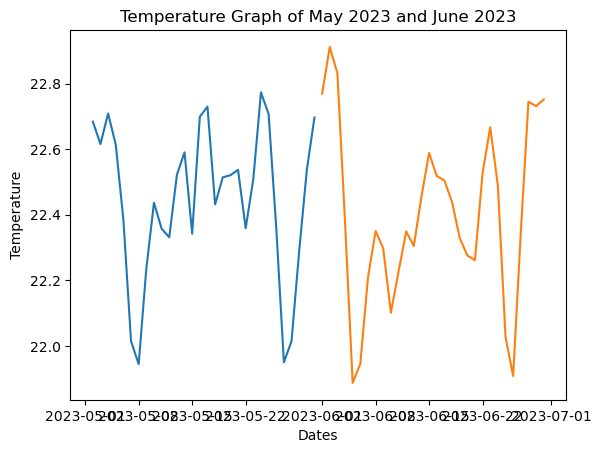

In [351]:
plt.title("Temperature Graph of May 2023 and June 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])
    

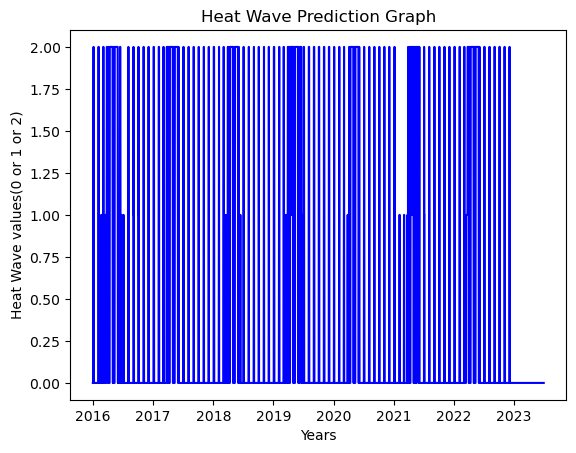

In [352]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [353]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-06-26,21.908506
2023-06-27,22.346373
2023-06-28,22.744710
2023-06-29,22.731135
2023-06-30,22.751217


# Predictions for July

In [354]:
#Since July has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. July 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2738
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6476.395
Date:                          Sat, 04 Mar 2023   AIC                          12964.790
Time:                                  19:10:15   BIC                          13000.209
Sample:                              01-01-2016   HQIC                         12977.597
                                   - 06-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6464      0.016     41.033      0.000       0.616       0.677
ar.L2         -0.0589      0.017     -3.566      0.000      -0.091      -0.027
ma.L1         -0.9508      0.006   -155.055      0.000      -0.963      -0.939
ar.S.L31       0.5233      0.015     33.949      0.000       0.493       0.553
ma.S.L31      -0.9999      2.030     -0.493      0.622      -4.978       2.978
sigma2         6.7529     13.660      0.494      0.621     -20.020      33.525
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6163.22
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [355]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of July 2023 are:",pred_new)

The predicted Temperature values of each day of July 2023 are: 2023-07-01    22.871018
2023-07-02    22.789199
2023-07-03    22.745821
2023-07-04    22.678301
2023-07-05    22.441871
2023-07-06    22.157687
2023-07-07    22.293476
2023-07-08    22.323766
2023-07-09    22.206692
2023-07-10    22.297350
2023-07-11    22.407755
2023-07-12    22.456882
2023-07-13    22.608789
2023-07-14    22.665900
2023-07-15    22.803758
2023-07-16    22.638725
2023-07-17    22.755074
2023-07-18    22.830682
2023-07-19    22.493487
2023-07-20    22.409587
2023-07-21    22.425723
2023-07-22    22.488833
2023-07-23    22.458118
2023-07-24    22.594010
2023-07-25    22.621691
2023-07-26    22.356996
2023-07-27    22.093788
2023-07-28    22.051063
2023-07-29    22.271400
2023-07-30    22.305436
2023-07-31    22.430511
Freq: D, Name: predicted_mean, dtype: float64


In [356]:
#Combining the pred July2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

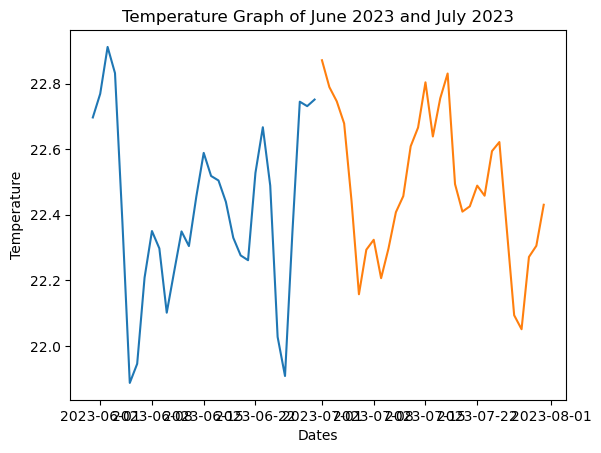

In [357]:
plt.title("Temperature Graph of June 2023 and July 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

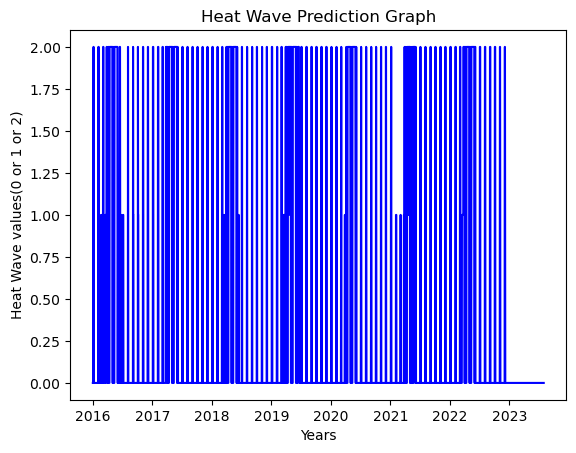

In [358]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [359]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-07-27,22.093788
2023-07-28,22.051063
2023-07-29,22.271400
2023-07-30,22.305436
2023-07-31,22.430511


# Predictions for August

In [360]:
#Since August has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. August 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2769
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6534.569
Date:                          Sat, 04 Mar 2023   AIC                          13081.137
Time:                                  19:11:32   BIC                          13116.625
Sample:                              01-01-2016   HQIC                         13093.962
                                   - 07-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6463      0.016     41.491      0.000       0.616       0.677
ar.L2         -0.0590      0.016     -3.613      0.000      -0.091      -0.027
ma.L1         -0.9507      0.006   -156.577      0.000      -0.963      -0.939
ar.S.L31       0.5232      0.015     34.338      0.000       0.493       0.553
ma.S.L31      -0.9999      1.885     -0.531      0.596      -4.694       2.694
sigma2         6.6770     12.538      0.533      0.594     -17.898      31.252
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6436.61
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [361]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-08-01    22.718329
2023-08-02    22.664925
2023-08-03    22.583483
2023-08-04    22.554395
2023-08-05    22.448734
2023-08-06    22.281882
2023-08-07    22.463188
2023-08-08    22.374528
2023-08-09    22.123255
2023-08-10    22.289830
2023-08-11    22.560952
2023-08-12    22.570669
2023-08-13    22.737893
2023-08-14    22.848302
2023-08-15    22.979539
2023-08-16    22.658314
2023-08-17    22.872405
2023-08-18    22.994758
2023-08-19    22.515209
2023-08-20    22.444629
2023-08-21    22.497443
2023-08-22    22.601226
2023-08-23    22.415032
2023-08-24    22.549313
2023-08-25    22.684588
2023-08-26    22.522770
2023-08-27    22.184142
2023-08-28    21.889922
2023-08-29    22.017109
2023-08-30    22.076060
2023-08-31    22.256081
Freq: D, Name: predicted_mean, dtype: float64


In [362]:
#Combining the pred August2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

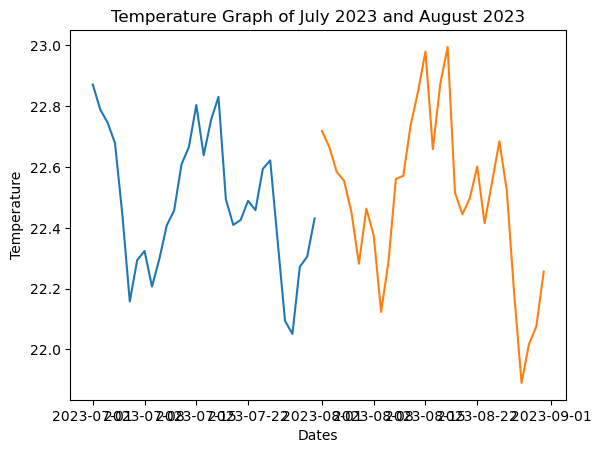

In [363]:
plt.title("Temperature Graph of July 2023 and August 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

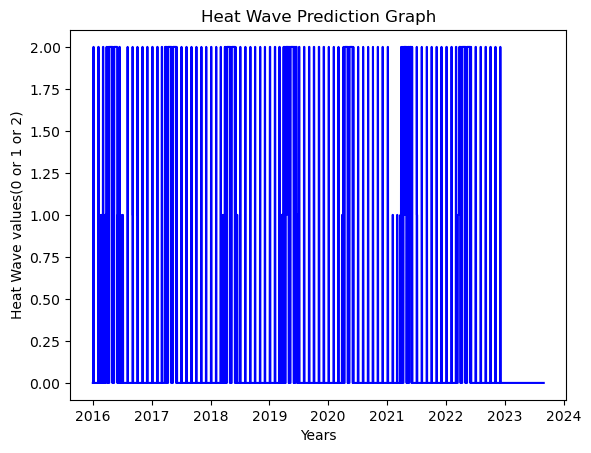

In [364]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [365]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-08-27,22.184142
2023-08-28,21.889922
2023-08-29,22.017109
2023-08-30,22.076060
2023-08-31,22.256081


# Predictions for September

In [366]:
#Since Saptember has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. September 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2800
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6722.719
Date:                          Sat, 04 Mar 2023   AIC                          13457.438
Time:                                  19:12:34   BIC                          13492.996
Sample:                              01-01-2016   HQIC                         13470.280
                                   - 08-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6477      0.014     45.366      0.000       0.620       0.676
ar.L2         -0.0746      0.019     -3.963      0.000      -0.111      -0.038
ma.L1         -0.9506      0.007   -130.328      0.000      -0.965      -0.936
ar.S.L30       0.4441      0.013     34.841      0.000       0.419       0.469
ma.S.L30      -0.9998      1.625     -0.615      0.538      -4.184       2.185
sigma2         7.2308     11.743      0.616      0.538     -15.785      30.246
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3716.98
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [367]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-09-01    22.371371
2023-09-02    22.109291
2023-09-03    21.810794
2023-09-04    22.027250
2023-09-05    22.262834
2023-09-06    22.369285
2023-09-07    22.195242
2023-09-08    21.928022
2023-09-09    22.138991
2023-09-10    22.300267
2023-09-11    22.232577
2023-09-12    22.563929
2023-09-13    22.589873
2023-09-14    22.566556
2023-09-15    22.537621
2023-09-16    22.535936
2023-09-17    22.480166
2023-09-18    22.201872
2023-09-19    22.233105
2023-09-20    22.451886
2023-09-21    22.519436
2023-09-22    22.290648
2023-09-23    22.053290
2023-09-24    22.175437
2023-09-25    22.499356
2023-09-26    22.614308
2023-09-27    22.360767
2023-09-28    22.368615
2023-09-29    22.436768
2023-09-30    22.670678
Freq: D, Name: predicted_mean, dtype: float64


In [368]:
#Combining the pred September2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

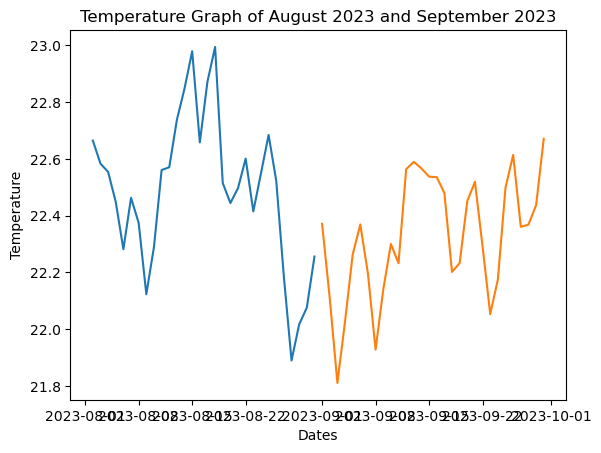

In [369]:
plt.title("Temperature Graph of August 2023 and September 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")

plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

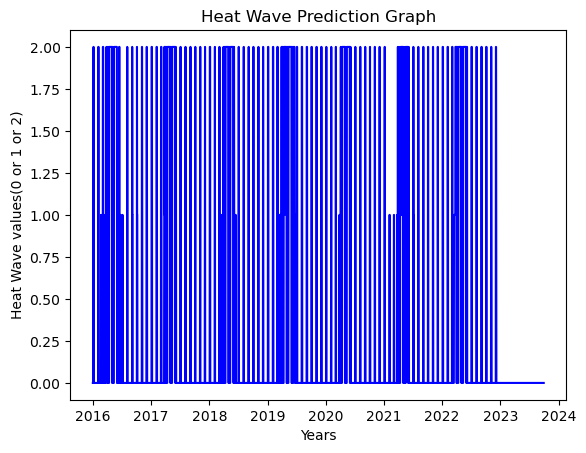

In [370]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [371]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-09-26,22.614308
2023-09-27,22.360767
2023-09-28,22.368615
2023-09-29,22.436768
2023-09-30,22.670678


# Prediction for October

In [372]:
#Since October has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. October 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2830
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6648.698
Date:                          Sat, 04 Mar 2023   AIC                          13309.395
Time:                                  19:13:51   BIC                          13345.015
Sample:                              01-01-2016   HQIC                         13322.253
                                   - 09-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6467      0.015     42.437      0.000       0.617       0.677
ar.L2         -0.0592      0.016     -3.707      0.000      -0.091      -0.028
ma.L1         -0.9508      0.006   -160.309      0.000      -0.962      -0.939
ar.S.L31       0.5229      0.015     35.096      0.000       0.494       0.552
ma.S.L31      -0.9999      2.774     -0.360      0.718      -6.436       4.436
sigma2         6.5310     18.071      0.361      0.718     -28.887      41.949
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              6986.16
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [373]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of October 2023 are:",pred_new)

The predicted Temperature values of each day of October 2023 are: 2023-10-01    22.585511
2023-10-02    22.668666
2023-10-03    22.406913
2023-10-04    22.129487
2023-10-05    22.218861
2023-10-06    22.345609
2023-10-07    22.376029
2023-10-08    22.386301
2023-10-09    22.138058
2023-10-10    22.062477
2023-10-11    22.264802
2023-10-12    22.438004
2023-10-13    22.598708
2023-10-14    22.698361
2023-10-15    22.764955
2023-10-16    22.807253
2023-10-17    22.575576
2023-10-18    22.696296
2023-10-19    22.629095
2023-10-20    22.348330
2023-10-21    22.439028
2023-10-22    22.518700
2023-10-23    22.466128
2023-10-24    22.172064
2023-10-25    22.299026
2023-10-26    22.590648
2023-10-27    22.629731
2023-10-28    22.297411
2023-10-29    22.034115
2023-10-30    22.081556
2023-10-31    22.246753
Freq: D, Name: predicted_mean, dtype: float64


In [374]:
#Combining the pred October2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

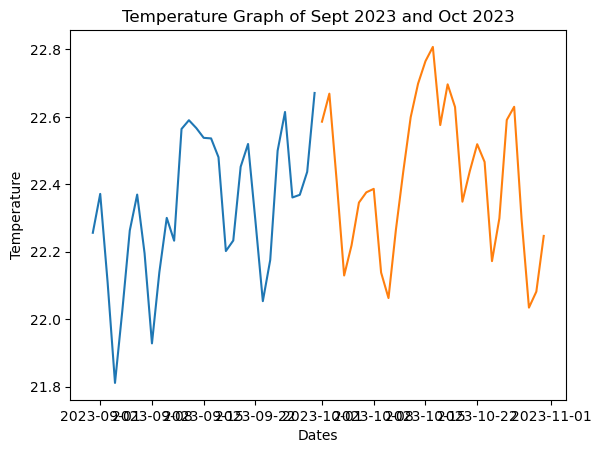

In [375]:
plt.title("Temperature Graph of Sept 2023 and Oct 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

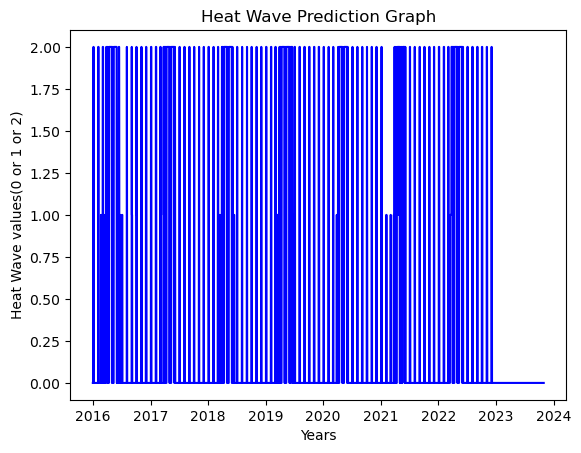

In [376]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [377]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-10-27,22.629731
2023-10-28,22.297411
2023-10-29,22.034115
2023-10-30,22.081556
2023-10-31,22.246753


# Prediction for November

In [378]:
#Since November has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. Nomvember 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2861
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6839.270
Date:                          Sat, 04 Mar 2023   AIC                          13690.539
Time:                                  19:15:11   BIC                          13726.227
Sample:                              01-01-2016   HQIC                         13703.414
                                   - 10-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6479      0.014     46.394      0.000       0.621       0.675
ar.L2         -0.0747      0.018     -4.059      0.000      -0.111      -0.039
ma.L1         -0.9507      0.007   -133.691      0.000      -0.965      -0.937
ar.S.L30       0.4438      0.012     35.593      0.000       0.419       0.468
ma.S.L30      -0.9999      3.470     -0.288      0.773      -7.801       5.801
sigma2         7.0764     24.550      0.288      0.773     -41.041      55.194
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4048.51
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [379]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of November 2023 are:",pred_new)

The predicted Temperature values of each day of November 2023 are: 2023-11-01    22.099441
2023-11-02    21.718391
2023-11-03    21.861794
2023-11-04    22.212702
2023-11-05    22.297847
2023-11-06    22.180314
2023-11-07    22.032699
2023-11-08    22.054917
2023-11-09    22.060475
2023-11-10    22.081472
2023-11-11    22.413195
2023-11-12    22.463225
2023-11-13    22.427814
2023-11-14    22.570776
2023-11-15    22.494196
2023-11-16    22.280216
2023-11-17    22.271639
2023-11-18    22.302924
2023-11-19    22.367776
2023-11-20    22.429913
2023-11-21    22.322450
2023-11-22    22.005587
2023-11-23    21.932953
2023-11-24    22.380998
2023-11-25    22.775611
2023-11-26    22.672866
2023-11-27    22.473773
2023-11-28    22.395466
2023-11-29    22.568403
2023-11-30    22.521873
Freq: D, Name: predicted_mean, dtype: float64


In [380]:
#Combining the pred November2023 data with the original dataset


res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

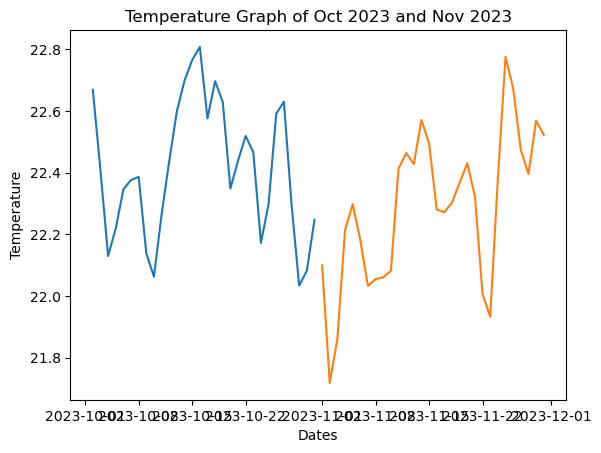

In [381]:

plt.title("Temperature Graph of Oct 2023 and Nov 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

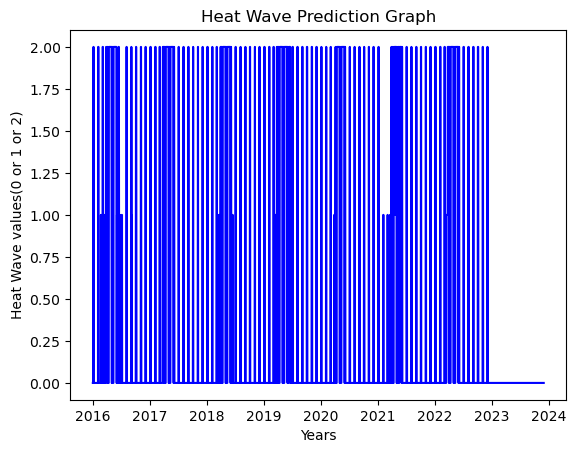

In [382]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [383]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-11-26,22.672866
2023-11-27,22.473773
2023-11-28,22.395466
2023-11-29,22.568403
2023-11-30,22.521873


# Prediction for December

In [384]:
#Since December has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. December 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2891
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6762.189
Date:                          Sat, 04 Mar 2023   AIC                          13536.377
Time:                                  19:16:20   BIC                          13572.127
Sample:                              01-01-2016   HQIC                         13549.268
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6467      0.015     43.341      0.000       0.617       0.676
ar.L2         -0.0592      0.016     -3.787      0.000      -0.090      -0.029
ma.L1         -0.9508      0.006   -163.615      0.000      -0.962      -0.939
ar.S.L31       0.5227      0.015     35.855      0.000       0.494       0.551
ma.S.L31      -0.9998      1.268     -0.789      0.430      -3.485       1.485
sigma2         6.3944      8.065      0.793      0.428      -9.412      22.201
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              7570.77
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [385]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of December 2023 are:",pred_new)

The predicted Temperature values of each day of December 2023 are: 2023-12-01    22.381083
2023-12-02    22.243699
2023-12-03    22.164503
2023-12-04    22.177806
2023-12-05    22.278354
2023-12-06    22.316935
2023-12-07    22.266343
2023-12-08    22.167436
2023-12-09    22.282111
2023-12-10    22.180452
2023-12-11    22.008858
2023-12-12    22.301842
2023-12-13    22.534258
2023-12-14    22.502204
2023-12-15    22.663157
2023-12-16    22.699950
2023-12-17    22.642462
2023-12-18    22.410736
2023-12-19    22.575104
2023-12-20    22.687562
2023-12-21    22.428189
2023-12-22    22.346947
2023-12-23    22.221458
2023-12-24    22.249407
2023-12-25    22.321627
2023-12-26    22.593769
2023-12-27    22.658406
2023-12-28    22.531238
2023-12-29    22.293570
2023-12-30    22.122553
2023-12-31    22.109183
Freq: D, Name: predicted_mean, dtype: float64


In [386]:
#Combining the pred December2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

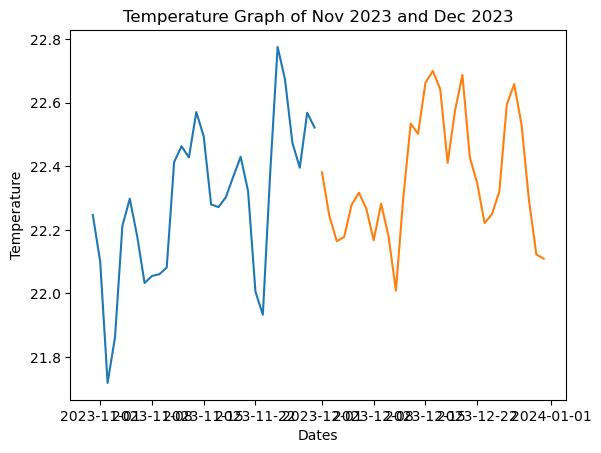

In [387]:
plt.title("Temperature Graph of Nov 2023 and Dec 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

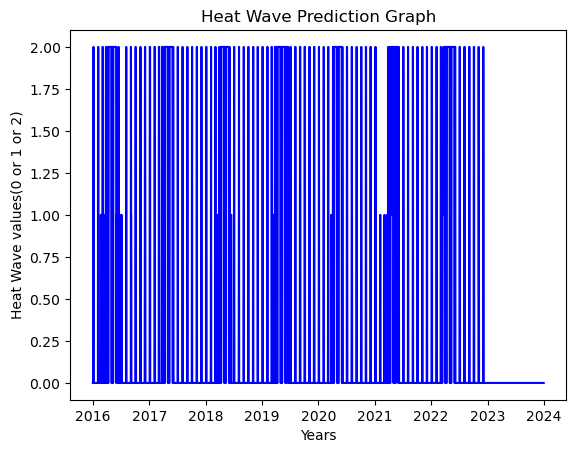

In [388]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [389]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-12-27,22.658406
2023-12-28,22.531238
2023-12-29,22.293570
2023-12-30,22.122553
2023-12-31,22.109183


In [390]:
print("The Average Mean Average Error across all 5 cities is:",1.7294)
print("The model fits the city of Khammam the best a we got the least AME value of",1.44896492)

The Average Mean Average Error across all 5 cities is: 1.7294
The model fits the city of Khammam the best a we got the least AME value of 1.44896492
